In [1]:
import os
import shutil
from google.colab import drive

# Монтирование Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Распаковываем и копируем с диска почищенный датасет 2.0 и внещний датасет CVUSA_aerials_segmentation
from google.colab import drive
import zipfile
import os


# Пути к zip-файлам на Google Drive
zip_path1 = '/content/drive/MyDrive/dataset_2.0.zip'

# Пути, куда распаковать содержимое zip-файлов
extract_to_path1 = '/content/dataset1'

folder_path = '/content/dataset1'
# Проверка существования папки, и создание если её нет
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Распаковываем первый zip-файл
with zipfile.ZipFile(zip_path1, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path1)
zip_path2 = '/content/drive/MyDrive/CVUSA_aerials_segmentation.v4i.yolov8.zip'

folder_path = '/content/dataset2'
extract_to_path2 = '/content/dataset2'

# Проверка существования папки, и создание если её нет
if not os.path.exists(folder_path):
    os.makedirs(folder_path)


# Распаковываем второй zip-файл
with zipfile.ZipFile(zip_path2, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path2)




In [ ]:
# гпт4 говорит, надо было разархивировать проще, не запускать, если уже распаковано.
import zipfile
import os


# Пути к zip-файлам на Google Drive и к папкам для распаковки
zip_paths = {
    '/content/drive/MyDrive/Dataset 1.21.zip': '/content/dataset1',
    '/content/drive/MyDrive/CVUSA_aerials_segmentation.v4i.yolov8.zip': '/content/dataset2'
}

# Распаковка zip-файлов
for zip_path, extract_to_path in zip_paths.items():
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)

print("Все файлы успешно распакованы.")


In [3]:
# обработка датасета 2 (внешний)
import os
import shutil

# Пути к исходным папкам с изображениями и метками в Colab
train_images_dir = '/content/dataset2/train/images'
train_labels_dir = '/content/dataset2/train/labels'
valid_images_dir = '/content/dataset2/valid/images'
valid_labels_dir = '/content/dataset2/valid/labels'
test_images_dir = '/content/dataset2/test/images'
test_labels_dir = '/content/dataset2/test/labels'

# Пути к новым папкам в Colab
new_train_images_dir = os.path.join('/content/final_dataset/train', 'images')
new_train_labels_dir = os.path.join('/content/final_dataset/train', 'labels')
new_valid_images_dir = os.path.join('/content/final_dataset/valid', 'images')
new_valid_labels_dir = os.path.join('/content/final_dataset/valid', 'labels')
new_test_images_dir = os.path.join('/content/final_dataset/test', 'images')
new_test_labels_dir = os.path.join('/content/final_dataset/test', 'labels')

# Создание новых папок, если они не существуют
os.makedirs(new_train_images_dir, exist_ok=True)
os.makedirs(new_train_labels_dir, exist_ok=True)
os.makedirs(new_valid_images_dir, exist_ok=True)
os.makedirs(new_valid_labels_dir, exist_ok=True)
os.makedirs(new_test_images_dir, exist_ok=True)
os.makedirs(new_test_labels_dir, exist_ok=True)

# Функция для копирования и переименования файлов
def process_and_copy_files(source_images_dir, source_labels_dir, new_images_dir, new_labels_dir, prefix):
    image_files = sorted([f for f in os.listdir(source_images_dir) if f.endswith('.jpg')])
    label_files = sorted([f for f in os.listdir(source_labels_dir) if f.endswith('.txt')])

    for i, (image_file, label_file) in enumerate(zip(image_files, label_files)):
        new_name = f"{prefix}_{i + 1}"
        shutil.copy(os.path.join(source_images_dir, image_file), os.path.join(new_images_dir, f"{new_name}.jpg"))
        shutil.copy(os.path.join(source_labels_dir, label_file), os.path.join(new_labels_dir, f"{new_name}.txt"))

# Обрабатываем и копируем файлы из train, valid и test папок
process_and_copy_files(train_images_dir, train_labels_dir, new_train_images_dir, new_train_labels_dir, 'GN_train')
process_and_copy_files(valid_images_dir, valid_labels_dir, new_valid_images_dir, new_valid_labels_dir, 'GN_valid')
process_and_copy_files(test_images_dir, test_labels_dir, new_test_images_dir, new_test_labels_dir, 'GN_test')

# Вывод первых трех файлов из каждой новой папки
print("Первые 3 файла в папке с изображениями (train):", sorted(os.listdir(new_train_images_dir))[:3])
print("Первые 3 файла в папке с метками (train):", sorted(os.listdir(new_train_labels_dir))[:3])
print("Первые 3 файла в папке с изображениями (valid):", sorted(os.listdir(new_valid_images_dir))[:3])
print("Первые 3 файла в папке с метками (valid):", sorted(os.listdir(new_valid_labels_dir))[:3])
print("Первые 3 файла в папке с изображениями (test):", sorted(os.listdir(new_test_images_dir))[:3])
print("Первые 3 файла в папке с метками (test):", sorted(os.listdir(new_test_labels_dir))[:3])


Первые 3 файла в папке с изображениями (train): ['GN_train_1.jpg', 'GN_train_10.jpg', 'GN_train_11.jpg']
Первые 3 файла в папке с метками (train): ['GN_train_1.txt', 'GN_train_10.txt', 'GN_train_11.txt']
Первые 3 файла в папке с изображениями (valid): ['GN_valid_1.jpg', 'GN_valid_10.jpg', 'GN_valid_11.jpg']
Первые 3 файла в папке с метками (valid): ['GN_valid_1.txt', 'GN_valid_10.txt', 'GN_valid_11.txt']
Первые 3 файла в папке с изображениями (test): ['GN_test_1.jpg', 'GN_test_10.jpg', 'GN_test_2.jpg']
Первые 3 файла в папке с метками (test): ['GN_test_1.txt', 'GN_test_10.txt', 'GN_test_2.txt']


In [4]:
# подсчитываем, сколько у нас файлов после переименования в датасете 2
import os

# Пути к папкам внутри final_dataset
paths = {
    'Train Images': '/content/final_dataset/train/images',
    'Train Labels': '/content/final_dataset/train/labels',
    'Valid Images': '/content/final_dataset/valid/images',
    'Valid Labels': '/content/final_dataset/valid/labels',
    'Test Images': '/content/final_dataset/test/images',
    'Test Labels': '/content/final_dataset/test/labels'
}

# Подсчёт и вывод количества файлов в каждой папке
for name, path in paths.items():
    if os.path.exists(path):
        total_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
        print(f"{name}: {total_files} файлов")
    else:
        print(f"{name}: Папка не существует")


Train Images: 54 файлов
Train Labels: 54 файлов
Valid Images: 16 файлов
Valid Labels: 16 файлов
Test Images: 10 файлов
Test Labels: 10 файлов


In [ ]:
#Не запускать. Удалялось из-за ошибочных действий.

!rm -rf /content/final_dataset/train_images
!rm -rf /content/final_dataset/train_labels
!rm -rf /content/final_dataset/
!rm -rf /content/dataset2

In [6]:

# Функция для обновления аннотаций с учетом новых классов
def update_annotations(path):
    for filename in os.listdir(path):
        if filename.endswith(".txt"):
            file_path = os.path.join(path, filename)
            with open(file_path, 'r') as file:
                lines = file.readlines()

            with open(file_path, 'w') as file:
                for line in lines:
                    parts = line.strip().split()
                    class_id = int(parts[0])
                    # Переназначение классов
                    if class_id == 0:  # Здания
                        parts[0] = '4'
                    elif class_id == 2:  # Дорога
                        parts[0] = '8'
                    elif class_id == 3:  # Дерево
                        parts[0] = '2'
                    file.write(" ".join(parts) + '\n')

# Пути к папкам с аннотациями
label_paths = [
    '/content/final_dataset/train/labels',
    '/content/final_dataset/valid/labels',
    '/content/final_dataset/test/labels'
]

print("Аннотации были успешно обновлены с учётом новых классов.")


Аннотации были успешно обновлены с учётом новых классов.


In [7]:
# Функция для удаления аннотаций класса тротуары (1)
def remove_annotations(path, class_id_to_remove):
    for filename in os.listdir(path):
        if filename.endswith(".txt"):
            file_path = os.path.join(path, filename)
            with open(file_path, 'r') as file:
                lines = file.readlines()

            with open(file_path, 'w') as file:
                for line in lines:
                    class_id = int(line.strip().split()[0])
                    # Записываем только строки, где ID класса не равен class_id_to_remove
                    if class_id != class_id_to_remove:
                        file.write(line)

# Пути к папкам с аннотациями
label_paths = [
    '/content/final_dataset/train/labels',
    '/content/final_dataset/valid/labels',
    '/content/final_dataset/test/labels'
]

# Удаление аннотаций класса 1
class_id_to_remove = 1
for label_path in label_paths:
    remove_annotations(label_path, class_id_to_remove)
    print(f"Removed annotations of class {class_id_to_remove} in {label_path}")


Removed annotations of class 1 in /content/final_dataset/train/labels
Removed annotations of class 1 in /content/final_dataset/valid/labels
Removed annotations of class 1 in /content/final_dataset/test/labels


In [9]:
# Проверим, удалился ли класс 1. Путь к папке с аннотациями финального датасета
final_dataset_labels_path = '/content/final_dataset/train/labels'

# Получение списка всех файлов меток
label_files = os.listdir(final_dataset_labels_path)

# Просмотр содержимого одного файла аннотаций
if label_files:
    with open(os.path.join(final_dataset_labels_path, label_files[0]), 'r') as file:
        lines = file.readlines()
        for line in lines:
            print(line)


2 0 1 0.048 0.9986666666666667 0.17866666666666667 0.88 0.432 0.62 0.6653333333333333 0.3626666666666667 0.9546666666666667 0.0013333333333333333 0.8813333333333333 0 0.7613333333333333 0.16533333333333333 0.588 0.368 0.19333333333333333 0.7813333333333333 0.005333333333333333 0.9506666666666667 0 0.9573333333333334 0 1


In [10]:
# Да, удалился. Теперь страхуемся на гугл диск
import shutil


# Путь к папке final_dataset на локальном диске Colab
local_path = '/content/final_dataset'

# Путь к месту на Google Drive, куда вы хотите скопировать папку
drive_path = '/content/drive/My Drive/dataset_CVUSA_reclassifyed'

# Копирование папки final_dataset на Google Drive
shutil.copytree(local_path, drive_path)

print("Папка dataset_CVUSA_reclassifyed успешно скопирована на Google Drive.")


Папка dataset_CVUSA_reclassifyed успешно скопирована на Google Drive.


In [11]:
# теперь переназначение классов в основном датасете
import os

# Пути к папкам с тренировочными и валидационными метками
train_labels_source = '/content/dataset1/train/labels'
valid_labels_source = '/content/dataset1/valid/labels'
test_labels_source = '/content/dataset1/test/labels'

# Пути к папкам, куда будут скопированы измененные метки
train_labels_dest = '/content/final_dataset/train/labels'
valid_labels_dest = '/content/final_dataset/valid/labels'
test_labels_dest =  '/content/final_dataset/test/labels'


# Проверка существования папки и создание, если её нет
if not os.path.exists(test_labels_dest):
    os.makedirs(test_labels_dest)

# Списки для конвертации классов
n1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
n2 = [0, 1, 2, 3, 4, 5, 4, 4, 6, 7]

def find_and_convert(num):
    if num in n1:
        return n2[n1.index(num)]
    else:
        return num

def convert_line(line):
    nums = line.strip().split()
    nums[0] = str(find_and_convert(int(nums[0])))
    return ' '.join(nums)

def copy_file_with_convert(file_path, destination_folder):
    with open(file_path, 'r') as file:
        filename = os.path.basename(file_path)
        new_file_path = os.path.join(destination_folder, filename)
        with open(new_file_path, 'w') as new_file:
            first_line = True
            for line in file:
                if first_line:
                    new_line = convert_line(line)
                    first_line = False
                else:
                    new_line = "\n" + convert_line(line)
                new_file.write(new_line)

def copy_text_files(source_folder, destination_folder):
    if not os.path.exists(source_folder):
        print(f"Source folder {source_folder} does not exist.")
        return

    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    for filename in os.listdir(source_folder):
        file_path = os.path.join(source_folder, filename)
        if os.path.isfile(file_path) and filename.endswith('.txt'):
            copy_file_with_convert(file_path, destination_folder)

    print(f"All text files from {source_folder} have been successfully copied to {destination_folder}.")

# Проверка существования папки и создание, если её нет
if not os.path.exists(test_labels_dest):
    os.makedirs(test_labels_dest)
# Применение функции для тренировочного и валидационного наборов данных
copy_text_files(train_labels_source, train_labels_dest)
copy_text_files(valid_labels_source, valid_labels_dest)
copy_text_files(test_labels_source, test_labels_dest)



All text files from /content/dataset1/train/labels have been successfully copied to /content/final_dataset/train/labels.
All text files from /content/dataset1/valid/labels have been successfully copied to /content/final_dataset/valid/labels.
All text files from /content/dataset1/test/labels have been successfully copied to /content/final_dataset/test/labels.


In [12]:
# Надо скопировать также имиджи в общий финал датасет

# Копирование тренировочных изображений
!cp -r /content/dataset1/train/images/. /content/final_dataset/train/images/

# Копирование тестовых изображений и меток в валидационную папку
!cp -r /content/dataset1/test/images/. /content/final_dataset/test/images/

# Копирование тестовых изображений и меток в валидационную папку
!cp -r /content/dataset1/valid/images/. /content/final_dataset/valid/images/

print("Файлы успешно скопированы")


Файлы успешно скопированы


In [13]:
# мы завершили переназначение классов всему датасету, поэтому снова сохраним его на диске

import shutil

# Путь к папке final_dataset на локальном диске Colab
local_path = '/content/final_dataset'

# Путь к месту на Google Drive, куда вы хотите скопировать папку
drive_path = '/content/drive/My Drive/dataset_2.0_and_CVUSA_reclassifyed'

# Копирование папки final_dataset на Google Drive
shutil.copytree(local_path, drive_path)

print("Папка dataset_2.0_and_CVUSA_reclassifyed успешно скопирована на Google Drive.")


Папка dataset_2.0_and_CVUSA_reclassifyed успешно скопирована на Google Drive.


In [14]:
import os

def count_files_in_directory(directory):
    total_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
    return total_files

# Путь к папке
dataset_path = '/content/final_dataset'

# Подсчет всех файлов во всех вложенных папках
total_files = count_files_in_directory(dataset_path)

# Вывод количества файлов
print(f"Всего файлов в папке {dataset_path} и её вложенных папках: {total_files}")


Всего файлов в папке /content/final_dataset и её вложенных папках: 34284


In [15]:
!pip install opencv-python-headless  # Используем headless версию, так как мы в среде без GUI


In [16]:
# Импорт необходимых библиотек для работы с YOLO и обучения модели
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Импорт библиотек для работы с файловой системой и визуализации
import os
import matplotlib.pyplot as plt

print("Библиотеки успешно импортированы.")


Библиотеки успешно импортированы.


In [17]:
import os
import shutil

# Пути к папкам с изображениями и аннотациями
images_dir = '/content/final_dataset/train/images'
labels_dir = '/content/final_dataset/train/labels'

# Путь к папке карантина, куда будут перемещены изображения без парных аннотаций
quarantine_dir = '/content/quarantine'
os.makedirs(quarantine_dir, exist_ok=True)

# Проверяем каждое изображение на наличие парной аннотации
for image_file in os.listdir(images_dir):
    if image_file.endswith('.jpg'):
        # Строим путь к файлу аннотации, соответствующему изображению
        label_file = image_file.replace('.jpg', '.txt')
        label_path = os.path.join(labels_dir, label_file)
        # Если файла аннотации не существует, перемещаем изображение в карантин
        if not os.path.exists(label_path):
            shutil.move(os.path.join(images_dir, image_file), quarantine_dir)

# Выводим сообщение о завершении процесса
print(f"Изображения без парных аннотаций были перемещены в папку карантин: {quarantine_dir}")



Изображения без парных аннотаций были перемещены в папку карантин: /content/quarantine


In [18]:
!ls -l /content/quarantine


total 0


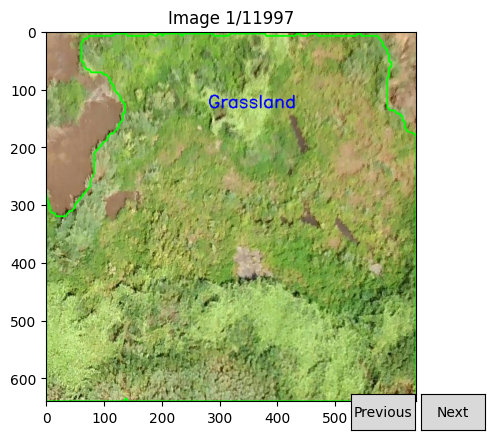

In [19]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import cv2
import numpy as np
import os
import random

# Указываем пути к папкам с изображениями и метками на Colab
images_dir = '/content/final_dataset/train/images'
labels_dir = '/content/final_dataset/train/labels'
class_names = ['Agricultural object', 'Fields', 'Forest', 'Grassland', 'Buildings', 'Power lines', 'Buildings', 'buildings', 'Road', 'Water']

class ImageBrowser:
    def __init__(self, images, labels, class_names):
        self.images = images
        self.labels = labels
        self.class_names = class_names
        self.index = 0
        self.fig, self.ax = plt.subplots()
        self.update()

        # Добавляем кнопки
        ax_prev = plt.axes([0.7, 0.05, 0.1, 0.075])
        ax_next = plt.axes([0.81, 0.05, 0.1, 0.075])
        self.b_next = Button(ax_next, 'Next')
        self.b_next.on_clicked(self.next)
        self.b_prev = Button(ax_prev, 'Previous')
        self.b_prev.on_clicked(self.prev)
        plt.show()

    def display_image_with_labels(self, image_path, label_path):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        with open(label_path, 'r') as f:
            lines = f.readlines()

        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            class_name = self.class_names[class_id]
            coords = np.array(parts[1:], dtype=np.float32)
            coords = coords.reshape(-1, 2)

            h, w = image.shape[:2]
            coords[:, 0] *= w
            coords[:, 1] *= h
            coords = coords.astype(np.int32)

            cv2.polylines(image, [coords], isClosed=True, color=(0, 255, 0), thickness=2)

            # Вычисляем центроид полигона
            centroid = np.mean(coords, axis=0).astype(np.int32)

            # Добавляем название класса в центре полигона
            cv2.putText(image, class_name, tuple(centroid), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        return image

    def update(self):
        image_path = self.images[self.index]
        label_path = self.labels[self.index]
        image = self.display_image_with_labels(image_path, label_path)
        self.ax.clear()
        self.ax.imshow(image)
        self.ax.set_title(f"Image {self.index + 1}/{len(self.images)}")
        plt.draw()

    def next(self, event):
        self.index = (self.index + 1) % len(self.images)
        self.update()

    def prev(self, event):
        self.index = (self.index - 1) % len(self.images)
        self.update()

# Получаем список файлов изображений и соответствующих файлов аннотаций
image_files = [os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.endswith('.jpg')]
label_files = [os.path.join(labels_dir, f.replace('.jpg', '.txt')) for f in os.listdir(images_dir) if f.endswith('.jpg')]

# Создаем экземпляр браузера изображений, если списки не пусты
if image_files and label_files:
    # Создаем экземпляр класса ImageBrowser
    browser = ImageBrowser(image_files, label_files, class_names)
else:
    print("No images or labels found.")


In [20]:

!git clone https://github.com/ultralytics/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 17613, done.
remote: Counting objects: 100% (525/525), done.
remote: Compressing objects: 100% (320/320), done.
remote: Total 17613 (delta 301), reused 349 (delta 200), pack-reused 17088
Receiving objects: 100% (17613/17613), 9.41 MiB | 19.94 MiB/s, done.
Resolving deltas: 100% (12262/12262), done.


In [21]:

!pip install ultralytics==8.0.20
from IPython import display
display.clear_output()



In [22]:
pip install PyYAML


In [25]:
import yaml

# Загрузка YAML-файла
yaml_file_path = '/content/data6.yaml'
with open(yaml_file_path, 'r') as stream:
    data = yaml.safe_load(stream)

# Обновление информации о классах
data['names'] = [
    'Agricultural object',
    'Fields',
    'Forest',
    'Grassland',
    'Building',  # Обновленный класс
    'Power lines',
    'Road',
    'Water'
]
data['nc'] = len(data['names'])  # Обновление количества классов

# Обновление путей в YAML-файле
data['train'] = '/content/final_dataset/train/images'
data['train_labels'] = '/content/final_dataset/train/labels'
data['val'] = '/content/final_dataset/valid/images'
data['val_labels'] = '/content/final_dataset/valid/labels'
data['test'] = '/content/final_dataset/test/images'
data['test_labels'] = '/content/final_dataset/test/labels'

# Сохранение обновленного YAML-файла
with open(yaml_file_path, 'w') as stream:
    try:
        yaml.dump(data, stream, default_flow_style=False)
        print(data)
    except yaml.YAMLError as exc:
        print(exc)

print("YAML-файл успешно обновлен.")


{'names': ['Agricultural object', 'Fields', 'Forest', 'Grassland', 'Building', 'Power lines', 'Road', 'Water'], 'nc': 8, 'test': '/content/final_dataset/test/images', 'test_labels': '/content/final_dataset/test/labels', 'train': '/content/final_dataset/train/images', 'train_labels': '/content/final_dataset/train/labels', 'val': '/content/final_dataset/valid/images', 'val_labels': '/content/final_dataset/valid/labels'}
YAML-файл успешно обновлен.


In [26]:
import os

# Пути к папкам внутри final_dataset
paths = {
    'Train Images': '/content/final_dataset/train/images',
    'Train Labels': '/content/final_dataset/train/labels',
    'Valid Images': '/content/final_dataset/valid/images',
    'Valid Labels': '/content/final_dataset/valid/labels',
    'Test Images': '/content/final_dataset/test/images',
    'Test Labels': '/content/final_dataset/test/labels'
}

# Подсчёт и вывод количества файлов в каждой папке
for name, path in paths.items():
    if os.path.exists(path):
        total_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
        print(f"{name}: {total_files} файлов")
    else:
        print(f"{name}: Папка не существует")


Train Images: 11997 файлов
Train Labels: 11997 файлов
Valid Images: 2575 файлов
Valid Labels: 2575 файлов
Test Images: 2570 файлов
Test Labels: 2570 файлов


In [32]:
# так как реклассификация сразу двух датасетов дело серьезное, проверяем все еще раз.
# Функция для проверки парности изображений и меток
def check_parity(images_dir, labels_dir):
    image_files = set(os.listdir(images_dir))
    label_files = set(f.replace('.jpg', '.txt') for f in image_files)
    labels_in_dir = set(os.listdir(labels_dir))

    unpaired_images = image_files - set(f.replace('.txt', '.jpg') for f in labels_in_dir)
    unpaired_labels = labels_in_dir - label_files

    return unpaired_images, unpaired_labels

target_train_images_dir = '/content/final_dataset/train/images'
target_train_labels_dir = '/content/final_dataset/train/labels'
target_valid_images_dir = '/content/final_dataset/valid/images'
target_valid_labels_dir = '/content/final_dataset/valid/labels'
# Проверка парности файлов в train и valid директориях
unpaired_train_images, unpaired_train_labels = check_parity(target_train_images_dir, target_train_labels_dir)
unpaired_valid_images, unpaired_valid_labels = check_parity(target_valid_images_dir, target_valid_labels_dir)

# Вывод информации о непарных файлах
print(f"Unpaired Train Images: {len(unpaired_train_images)}")
print(f"Unpaired Train Labels: {len(unpaired_train_labels)}")
print(f"Unpaired Valid Images: {len(unpaired_valid_images)}")
print(f"Unpaired Valid Labels: {len(unpaired_valid_labels)}")

# Вывод общего количества файлов после синхронизации
print(f"Total Train Images: {len(os.listdir(target_train_images_dir))}")
print(f"Total Train Labels: {len(os.listdir(target_train_labels_dir))}")
print(f"Total Valid Images: {len(os.listdir(target_valid_images_dir))}")
print(f"Total Valid Labels: {len(os.listdir(target_valid_labels_dir))}")



Unpaired Train Images: 0
Unpaired Train Labels: 1792
Unpaired Valid Images: 1792
Unpaired Valid Labels: 0
Total Train Images: 10205
Total Train Labels: 11997
Total Valid Images: 4351
Total Valid Labels: 2559


In [36]:
import zipfile

# Путь для упаковки, перенесем всю папку ранс на гугл драйв
folder_path = '/content/final_dataset'

# имя архива
zip_file = '/content/dataset_joint_buildings.zip'

# Создайте архив
with zipfile.ZipFile(zip_file, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, folder_path)
            zipf.write(file_path, arcname=arcname)

print(f"Архив {zip_file} успешно создан.")


Архив /content/dataset_joint_buildings.zip успешно создан.


In [37]:
import shutil

# Путь к созданному вами архиву
zip_file_path = '/content/dataset_joint_buildings.zip'

# Путь к месту на Google Drive, куда хотите переместить архив
drive_destination_path = '/content/drive/My Drive/dataset_joint_buildings1'

# Скопируйте архив на Google Drive
shutil.copy(zip_file_path, drive_destination_path)

print(f"Архив {zip_file_path} успешно скопирован на Google Drive в папку {drive_destination_path}.")




Архив /content/dataset_joint_buildings.zip успешно скопирован на Google Drive в папку /content/drive/My Drive/dataset_joint_buildings1.


In [27]:
from ultralytics import YOLO

model72 = YOLO('/content/yolov8s-seg.pt')
# Display model information (optional)
model72.info()


100%|██████████| 22.8M/22.8M [00:00<00:00, 80.5MB/s]

YOLOv8s-seg summary: 261 layers, 11821056 parameters, 0 gradients, 42.9 GFLOPs


In [28]:
results = model72.train(data='/content/data6.yaml', epochs=20, imgsz=640, save=True, project='/content/runs')

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/content/data6.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=/content/runs, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fals

In [ ]:
yolo segment val model=yolov8n.pt data=data6.yaml batch=1

In [33]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model72 = YOLO('/content/runs/train/weights/best.pt')

# Define path to the image file
source = '/content/hotel.jpg'

# Run inference on the source
results = model72(source)  # list of Results objects

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8s-seg summary (fused): 195 layers, 11782696 parameters, 0 gradients, 42.5 GFLOPs


In [36]:
model72.predict(source='/content/hotel.jpg', save=True)  # предсказать по изображению


Results saved to runs/segment/predict


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([11, 6])
 dtype: torch.float32
  + tensor([[1.00000e+00, 4.94000e+02, 3.12000e+02, 6.65000e+02, 7.24274e-01, 4.00000e+00],
         [3.23000e+02, 5.49000e+02, 5.20000e+02, 6.66000e+02, 7.02870e-01, 2.00000e+00],
         [2.04000e+02, 0.00000e+00, 8.86000e+02, 2.29000e+02, 6.36164e-01, 2.00000e+00],
         [3.70000e+01, 5.00000e+00, 4.03000e+02, 5.47000e+02, 5.53245e-01, 2.00000e+00],
         [0.00000e+00, 2.10000e+01, 1.31000e+02, 2.09000e+02, 5.07906e-01, 4.00000e+00],
         [1.86000e+02, 3.59000e+02, 2.27000e+02, 3.93000e+02, 3.89629e-01, 0.00000e+00],
         [0.00000e+00, 1.70000e+02, 4.00000e+02, 5.46000e+02, 3.67972e-01, 2.00000e+00],
         [5.55000e+02, 5.28000e+02, 6.25000e+02, 5.53000e+02, 3.54858e-01, 0.00000e+00],
         [1.19000e+02, 3.29000e+02, 1.60000e+02, 3.72000e+02, 3.28014e-01, 0.00000e+00],
         [1.38000e+02, 2.00000e+00, 6.10000e

In [38]:
model72.predict(source="/content/berlin147_image.png", save=True)  # предсказать по изображению


Results saved to runs/segment/predict


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([36, 6])
 dtype: torch.float32
  + tensor([[1.51600e+03, 9.70000e+02, 1.70500e+03, 1.14900e+03, 8.21750e-01, 0.00000e+00],
         [1.64200e+03, 4.81000e+02, 2.16000e+03, 9.85000e+02, 7.08352e-01, 0.00000e+00],
         [6.69000e+02, 2.18600e+03, 1.46800e+03, 2.45200e+03, 6.99664e-01, 0.00000e+00],
         [1.95500e+03, 0.00000e+00, 2.38800e+03, 2.67000e+02, 6.21917e-01, 0.00000e+00],
         [1.36700e+03, 1.83700e+03, 1.51700e+03, 1.95700e+03, 6.11777e-01, 0.00000e+00],
         [1.37900e+03, 1.00300e+03, 1.46400e+03, 1.08300e+03, 5.88231e-01, 0.00000e+00],
         [2.51400e+03, 0.00000e+00, 2.61100e+03, 3.90000e+01, 5.16796e-01, 0.00000e+00],
         [2.46800e+03, 1.50000e+02, 2.61000e+03, 4.03000e+02, 5.06014e-01, 0.00000e+00],
         [1.45500e+03, 1.08500e+03, 1.58500e+03, 1.19200e+03, 4.77569e-01, 0.00000e+00],
         [1.41500e+03, 9.70000e+02, 1.71100e

In [39]:
model72.predict(source="/content/berlin132_image.png", save=True)  # предсказать по изображению


Results saved to runs/segment/predict


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([18, 6])
 dtype: torch.float32
  + tensor([[1.48800e+03, 1.11500e+03, 2.60500e+03, 2.43000e+03, 8.72934e-01, 7.00000e+00],
         [1.57200e+03, 5.00000e+00, 1.73400e+03, 1.23000e+02, 6.25073e-01, 0.00000e+00],
         [9.59000e+02, 2.83000e+02, 1.21500e+03, 4.66000e+02, 5.07650e-01, 0.00000e+00],
         [6.87000e+02, 1.53000e+02, 7.82000e+02, 2.48000e+02, 5.05726e-01, 0.00000e+00],
         [0.00000e+00, 1.88800e+03, 6.66000e+02, 2.45200e+03, 5.04676e-01, 4.00000e+00],
         [1.85500e+03, 6.71000e+02, 2.00900e+03, 7.92000e+02, 4.81447e-01, 0.00000e+00],
         [1.32000e+03, 0.00000e+00, 2.01100e+03, 3.53000e+02, 4.79102e-01, 0.00000e+00],
         [6.93000e+02, 6.70000e+01, 8.38000e+02, 1.98000e+02, 4.61117e-01, 0.00000e+00],
         [1.28000e+03, 8.47000e+02, 1.39500e+03, 1.05700e+03, 4.47444e-01, 0.00000e+00],
         [1.18100e+03, 1.40000e+01, 1.37100e

In [ ]:
model7.predict(source="/content/1496846949 (Original).mp4", save=True)  # предсказать по видео


Results saved to /content/runs/predict


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([3, 6])
 dtype: torch.float32
  + tensor([[1.49000e+02, 0.00000e+00, 1.95000e+03, 2.16000e+03, 5.13926e-01, 8.00000e+00],
         [1.60900e+03, 3.00000e+00, 2.39300e+03, 9.40000e+02, 3.15647e-01, 7.00000e+00],
         [2.96900e+03, 1.70000e+01, 3.82800e+03, 2.15500e+03, 2.67740e-01, 7.00000e+00]], device='cuda:0')Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Masks'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([3, 384, 640])
 dtype: torch.float32
  + tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
      

In [ ]:
import cv2
import PIL
# Define source as YouTube video URL
source = 'https://youtu.be/MquNP8RQUpY?si=XSO1cMNlMv5Pfll6'

# Run inference on the source
model7.predict(source='https://youtu.be/MquNP8RQUpY?si=XSO1cMNlMv5Pfll6', stream=True, save=True)  # предсказать по изображению
results=model7


In [40]:
import zipfile

# Путь для упаковки, перенесем всю папку ранс на гугл драйв
folder_path = '/content/runs/'

# имя архива
zip_file = '/content/runs72.zip'

# Создайте архив
with zipfile.ZipFile(zip_file, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, folder_path)
            zipf.write(file_path, arcname=arcname)

print(f"Архив {zip_file} успешно создан.")


Архив /content/runs72.zip успешно создан.


In [41]:
import shutil

# Путь к созданному вами архиву
zip_file_path = '/content/runs72.zip'

# Путь к месту на Google Drive, куда хотите переместить архив
drive_destination_path = '/content/drive/My Drive/'

# Скопируйте архив на Google Drive
shutil.copy(zip_file_path, drive_destination_path)

print(f"Архив {zip_file_path} успешно скопирован на Google Drive в папку {drive_destination_path}.")




Архив /content/runs72.zip успешно скопирован на Google Drive в папку /content/drive/My Drive/.
